# Optical Forces on Metal Nanoparticles

This notebook calculates force acting on a metal nanoparticle in a Gaussian beam. The equations are mainly addapted from [Nanoscale, 2014, 6, 4458](https://doi.org/10.1039/C3NR06617G). Corrections have been made to Eqn. (4.b) and (11.4) and a measured dielectric function for gold was used insted of a modeled dielctric funtion. 

Author(s): *M. Fränzl*

## Packages and Settings

In [1]:
import numpy as np
pi = np.pi
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size' : 14,
                     'axes.labelpad' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1,}) 

## Theoretical Background

For a spherical particle with a radius $R \approx \lambda$ irradiated by an arbitrary monochromatic EM wave the time-averaged radiation-induced force is:
\begin{equation}
\langle\vec F\rangle = \frac{1}{4}\epsilon_0\epsilon_r\,\mathrm{Re}(\alpha)\nabla|\vec E|^2 + \frac{1}{2}\epsilon_0\epsilon_r\,\mathrm{Im}(\alpha)\;\mathrm{Im}\left(\sum_{n}E^*_n\nabla E_n\right)
\end{equation}
where the $n$ runs over $x,y,z$ and $\alpha(\omega) = \alpha_1(\omega) + \mathrm{i}\alpha_2(\omega)$ is the complex polarisability of the sphere. The total force can be split into two components; the gradient and the
 scattering force:
 \begin{align}
\langle\vec F_\mathrm{grad}\rangle &= \frac{1}{4}\epsilon_0\epsilon_r\,\mathrm{Re}(\alpha)\,\nabla|\vec E|^2 \\
\langle\vec F_\mathrm{scat}\rangle &= \frac{1}{2}\epsilon_0\epsilon_r\,\mathrm{Im}(\alpha)\;\mathrm{Im}\left(\sum_{k}E^*_k\nabla E_k\right)
\end{align}

For a Gaussian beam the electric field $\vec E$ is given as: 
\begin{equation}
E(r,z) = E_0\frac{w_0}{w(z)}\exp\left(-\frac{r^2}{w(z)^2}\right)\exp\left(-\mathrm ik z-\mathrm ik\frac{r^2}{2R(z)}+\mathrm i\zeta(z)\right)
\end{equation} 
where $w(z$) is the radius of the beam:
\begin{equation}
w(z) = w_0\sqrt{1+\left(\frac{z}{z_\mathrm{R}}\right)^2}\ , 
\end{equation}
$z_\mathrm{R} = \pi w_0^2/\lambda$ the Rayleigh range, $R(z)$ the curvature of the wavefronts:
\begin{equation}
R(z) = z\left(1+\left(\frac{z_\mathrm{R}}{z}\right)^2\right),
\end{equation} 
and $\zeta(z) = \arctan(z/z_\mathrm{R})$ the Gouy phase shift.

If we insert the electric field for Gaussian beam in the equations for the gradient and scattering force we get for $r$- und $z$-components:
\begin{align}
    F_r^\mathrm{grad}(r,z) &= -\frac{2\epsilon_0}{\pi} \mathrm{Re}(\alpha)\,|E_0|^2 r \frac{w_0^2}{w(z)^4}\exp\left(-\frac{2r^2}{w(z)^2}\right) \\
    F_z^\mathrm{grad}(r,z) &= -\frac{\epsilon_0}{\pi} \mathrm{Re}(\alpha)\,|E_0|^2 z \frac{w_0^4}{z_\mathrm{R}^2}\left(\frac{1}{w(z)^4}-\frac{2r^2}{w(z)^6}\right)\exp\left(-\frac{2r^2}{w(z)^2}\right) \\
    F_r^\mathrm{scat}(r,z) &= \frac{\epsilon_0}{\pi} \mathrm{Im}(\alpha)\,|E_0|^2 r \frac{w_0^2}{w(z)^2}\frac{k}{R(z)}\exp\left(-\frac{2r^2}{w(z)^2}\right) \\
    F_z^\mathrm{scat}(r,z) &= \frac{\epsilon_0}{\pi} \mathrm{Im}(\alpha)\,|E_0|^2 \frac{w_0^2}{w(z)^2}\left(k\left(1-\frac{r^2}{2}\frac{z^2-z_\mathrm{R}^2}{(z^2+z_\mathrm{R}^2)^2}\right)+\frac{w_0^2}{z_\mathrm{R}w(z)^2}\right)\exp\left(-\frac{2r^2}{w(z)^2}\right)
\end{align}

The complex polarisability of metal nanoparticles with $R \approx \lambda$ can be approximated as 
\begin{align}
\alpha(\omega) = \frac{1-(1/10)(\epsilon(\omega)+\epsilon_\mathrm{r})\,\xi^2}{\left(1/3+\epsilon_\mathrm{r}/(\epsilon(\omega) - \epsilon_\mathrm{r})\right)-(1/30)(\epsilon(\omega) + 10\epsilon_\mathrm{r})\,\xi^2-\mathrm i4\pi^2\epsilon^{3/2}_\mathrm{r}V/(3\lambda^3)}
\end{align}
where $\xi = 2\pi R/\lambda$ is a size parameter and $V=4/3\pi R^3$ the volume of the particle.

### Optical Parameters for Gold Nanoparticles

Let's take a look at the complex polarisability of a gold nanoparticle. First, we need to know the complex permittivity $\epsilon(\omega) = \epsilon_1(\omega) + \mathrm i\epsilon_2(\omega)$ of gold:

In [2]:
from scipy.interpolate import interp1d

lda, n, k = np.transpose(np.loadtxt('Au_nk.txt', skiprows=1)) # load the refractive index and the extinction coefficient 
eps = interp1d(lda*1e-6, (n +1j*k)**2) # convert to permittivity and find an interpolation function

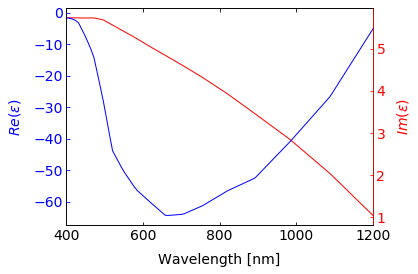

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(5.5,4))
ax2 = ax1.twinx()
lda = np.linspace(400, 1200, 100)*1e-9
ax1.plot(lda*1e9, np.real(eps(lda)), 'r')
ax1.set_ylabel(r'$Re(\epsilon)$', color='b')
ax1.tick_params('y', colors='b')
ax1.spines['left'].set_color('b')
ax2.plot(lda*1e9, np.imag(eps(lda)), 'b')
ax2.set_ylabel(r'$Im(\epsilon)$', color='r')
ax2.tick_params('y', colors='r')
ax2.spines['right'].set_color('r')
ax1.set_xlabel(r'Wavelength [nm]')
ax1.set_xlim(lda.min()*1e9, lda.max()*1e9)
plt.show()

Plot the polarisability for a gold nanoparticle with given diameter:

In [6]:
d = 80e-9 # diameter
c = 3.0e8 # speed of light
epsr = 1.8 # relative permittivity of water for visible light

def alpha(lda):
    V = 4/3*pi*(d/2)**3
    x = pi*d/lda
    return V*(1-1/10*(eps(lda) + epsr)*x**2)/((1/3 + epsr/(eps(lda) - epsr)) - 1/30*(eps(lda) + 10*epsr)*x**2 - 1j*4*pi**2*epsr**(3/2)/3*V/lda**3)

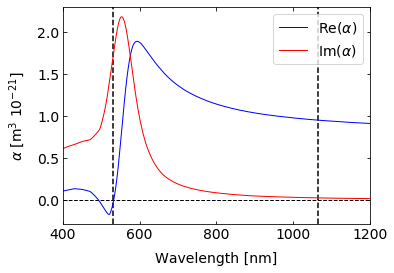

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5.5,4))
lda = np.linspace(400, 1200, 250)*1e-9
ax.axhline(y=0, c='k', ls='--')
ax.axvline(x=532, c='k', ls='--', lw=1.5)
ax.axvline(x=1064, c='k', ls='--', lw=1.5)
ax.plot(lda*1e9, np.real(alpha(lda))*1e21, 'b', label=r'Re($\alpha$)')
ax.plot(lda*1e9, np.imag(alpha(lda))*1e21, 'r', label=r'Im($\alpha$)')
ax.set_xlabel(r'Wavelength [nm]')
ax.set_ylabel(r'$\alpha$ [m$^3$ $10^{-21}$]')
ax.set_xlim(lda.min()*1e9, lda.max()*1e9)
ax.legend(loc='upper right')
plt.show()

The scattering and extinction cross sections are related to the complex polarisability as follows:
\begin{align}
\sigma_\mathrm{sca} &= \frac{k^4}{6\pi}|\alpha|^2 \\
\sigma_\mathrm{abs} &= k\,\mathrm{Im}(\alpha) 
\end{align}

\begin{align}
\sigma_\mathrm{ext} &= \sigma_\mathrm{abs} + \sigma_\mathrm{sca}
\end{align}

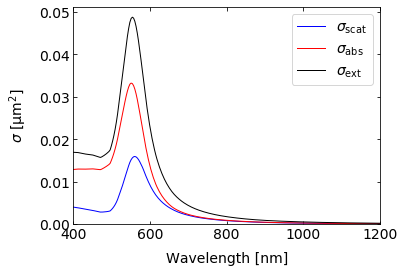

In [8]:
def k(lda): # wave number
    return 2*pi*np.sqrt(epsr)/lda 

fig, ax = plt.subplots(1, 1, figsize=(5.5,4))
lda = np.linspace(400, 1200, 250)*1e-9
#ax.axvline(x=532, c='k', ls='--', lw=1.5)
#ax.axvline(x=1064, c='k', ls='--', lw=1.5)
ax.plot(lda*1e9, k(lda)**4*np.abs(alpha(lda))**2/(6*pi)*1e12, 'b', label=r'$\sigma_\mathrm{scat}$')
ax.plot(lda*1e9, k(lda)*np.imag(alpha(lda))*1e12, 'r', label=r'$\sigma_\mathrm{abs}$')
ax.plot(lda*1e9, (k(lda)**4*np.abs(alpha(lda))**2/(6*pi)+ k(lda)*np.imag(alpha(lda)))*1e12, 'k', label=r'$\sigma_\mathrm{ext}$')
ax.set_xlabel(r'Wavelength [nm]')
ax.set_ylabel(r'$\sigma$ [µm$^2$]')
ax.set_xlim(lda.min()*1e9, lda.max()*1e9)
ax.set_ylim(ymin=0)
ax.legend(loc='upper right')
plt.show()

### Force Field

In [9]:
P = 0.01 # laser power
lda = 1064e-9 # wavelength
NA = 0.9 # numerical apperture of objective lens

w0 = lda/(NA*pi) # beam waist
zR = pi*w0**2*np.sqrt(epsr)/lda # Rayleith range

def w(z):
    return w0*np.sqrt(1+(z/zR)**2)

def R(z):
    return z*(1+(zR/z)**2)

k = 2*pi*np.sqrt(epsr)/lda # wave number
eps0 = 8.854e-12 # vacuum permittivity
mu0 = 1.257e-6
Z0 = np.sqrt(mu0/eps0) 
E0 = 2/w0*np.sqrt(Z0*P/pi)

def F_r_grad(r, z):   
    return -2*eps0/pi*np.real(alpha(lda))*E0**2*r*w0**2/w(z)**4*np.exp(-2*(r/w(z))**2)

def F_z_grad(r, z):
    return -eps0/pi*np.real(alpha(lda))*E0**2*z*w0**4/zR**2*(1/w(z)**4-2*r**2/w(z)**6)*np.exp(-2*(r/w(z))**2)

def F_r_scat(r, z):
    return eps0/pi*np.imag(alpha(lda))*E0**2*r*w0**2/w(z)**2*k/R(z)*np.exp(-2*(r/w(z))**2)

def F_z_scat(r, z):
    return eps0/pi*np.imag(alpha(lda))*E0**2*w0**2/w(z)**2*(k*(1-r**2/2*(z**2-zR**2)/(z**2+zR**2)**2) + w0**2/(zR*w(z)**2))*np.exp(-2*(r/w(z))**2)

def F_r(r, z):
    return F_r_grad(r, z) + F_r_scat(r, z)

def F_z(r, z):
    return F_z_grad(r, z) + F_z_scat(r, z)

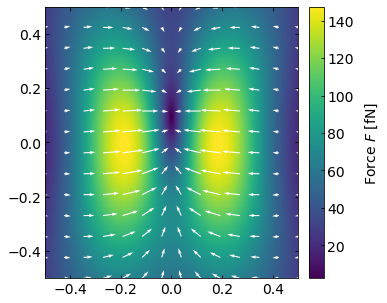

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
X, Y = np.meshgrid(np.linspace(-0.5e-6, 0.5e-6, 250), np.linspace(-0.5e-6, 0.5e-6, 250))
im = ax.pcolormesh(X*1e6, Y*1e6, np.sqrt(F_r(X,Y)**2 + F_z(X,Y)**2)*1e15, cmap='viridis')
X, Y = np.meshgrid(np.linspace(-0.5e-6, 0.5e-6, 14), np.linspace(-0.5e-6, 0.5e-6, 14))
ax.quiver(X*1e6, Y*1e6, F_r(X, Y), F_z(X, Y), color='w')
#ax.streamplot(X*1e6, Y*1e6, F_r(X, Y), F_z(X, Y), density=0.8, color='0.8')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.2, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel(r'Force $F$ [fN]')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
plt.show()